# Bike Sharing Demand

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [13]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sub = pd.read_csv('./sampleSubmission.csv')

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

## (실습1) 데이터를 알아가기 위한 여러가지 질문을 작성해 보자.
`-` 01. datetime은 언제부터 언제까지의 데이터일까?


`-` 02-A count와 temp는 어떤 상관관계가 있을까?

- 산점도(scatter plot)로 확인해 보기 - matplotlib 활용해 보기
- type은 점으로 표시
- 투명도를 0.2로 표현


`-` 02-B corr()를 활용하여 count와 다른 feature(특징)간의 상관계수를 확인해 보자.

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 결측치가 없고, 라벨 인코딩이 되어 있다!

In [7]:
train['datetime'].sort_values()

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [20]:
train['datetime'].min(), train['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

In [21]:
test['datetime'].min(), test['datetime'].max()

('2011-01-20 00:00:00', '2012-12-31 23:00:00')

- train : 2011-01-01 부터 2012-12-19일 까지의 데이터
- test : 2011-01-20 부터 2012-12-30일 까지의 데이터

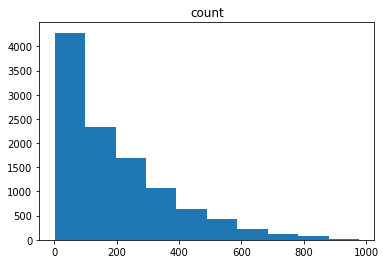

In [26]:
# count 의 histogram
plt.hist(train['count'])
plt.title("count")
plt.show()

In [28]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

- 시간대별 자전거 대여수의 평균이 191건
- 시간대별 최소 대여건수는 1대 최대 대여건수는 977건

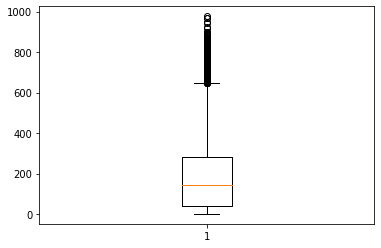

In [31]:
plt.boxplot(train['count'])
plt.show()

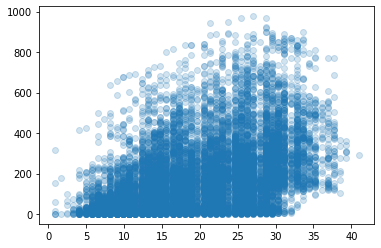

In [32]:
#  count와 temp는 어떤 상관관계가 있을까?
plt.scatter(train['temp'], train['count'], alpha=0.2)

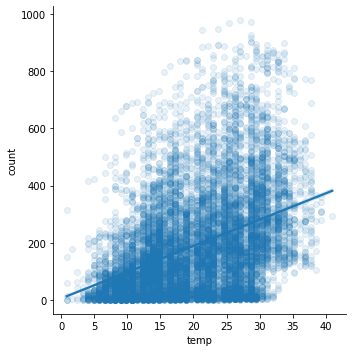

In [39]:
sns.lmplot(x = 'temp', y = 'count', data = train, scatter_kws={"alpha":.1})

In [23]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

### 계절별 데이터를 확인 및 시각화 해보자

In [45]:
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [53]:
train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

C:\Users\82103\anaconda3\envs\py38r40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82103\anaconda3\envs\py38r40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


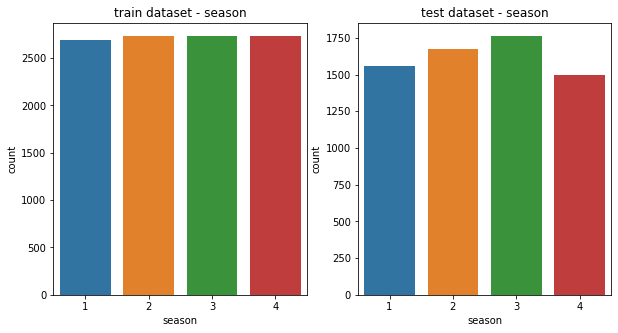

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(train['season'])
plt.title("train dataset - season")

plt.subplot(1,2,2)
sns.countplot(test['season'])
plt.title('test dataset - season')
plt.show()

- trian 데이터에는 균등하게 있고, test 데이터에는 2, 3 (여름, 가을) 이 많다.
- test 데이터는 왜 season에 따른 데이터 개수가 다를까?

In [62]:
test['season'].value_counts()

3    1763
2    1676
1    1556
4    1498
Name: season, dtype: int64

In [43]:
train['count'].groupby(train['season']).mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

### 쉬는 날과 아닌 날의 데이터는 얼마나 될까? 이를 시각화 하기

In [59]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

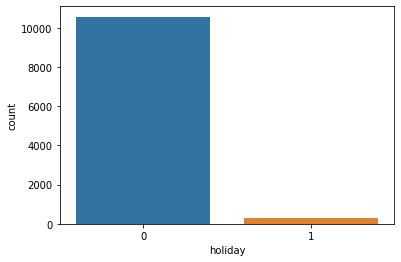

In [61]:
sns.countplot(x='holiday', data=train)
plt.show()

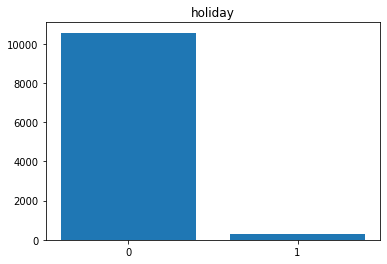

In [65]:
plt.bar(train['holiday'].value_counts().index.astype(str), train['holiday'].value_counts().values)
plt.title("holiday")
plt.show()

- 너무 불균형한 데이터! (꼭 타겟값이 아니여도 stratify로 조절해줄 수 있다.)

### weather은 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?

In [66]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [67]:
test['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

- 엄청 비가 많이 올 때는 자전거 대여건수가 1건으로 매우 드물다. (거의 없다.)

### 수치형 데이터의 분포?
- temp의 값의 분포는 어떨까?
- atemp의 값의 분포는 어떨까?
- humidity의 값의 분포는 어떨까?
- windspeed의 값의 분포는 어떨까?

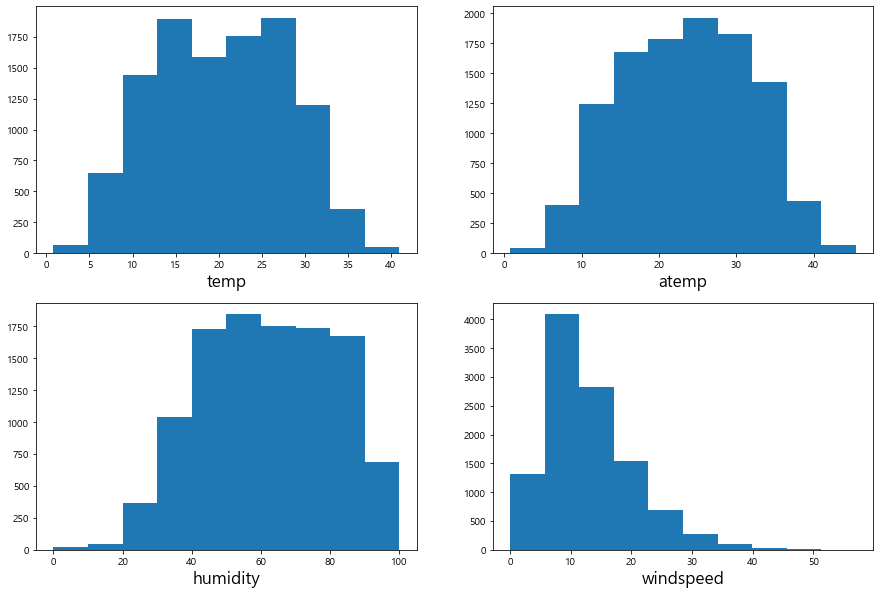

In [81]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(train['temp'])
plt.xlabel("temp", size=17)

plt.subplot(2,2,2)
plt.hist(train['atemp'])
plt.xlabel("atemp", size=17)

plt.subplot(2,2,3)
plt.hist(train['humidity'])
plt.xlabel("humidity", size=17)

plt.subplot(2,2,4)
plt.hist(train['windspeed'])
plt.xlabel("windspeed", size=17)

plt.show()

- temp와 atemp는 정규분포를 갖는다. (일반적인 데이터 셋)
- humidity는 정규분포의 형태
- windspped는 조금 불균형해 보인다.

### weather별 데이터의 비율은 어느정도 될까?

In [76]:
print(train['weather'].value_counts() / train['weather'].shape[0])

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64


In [79]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

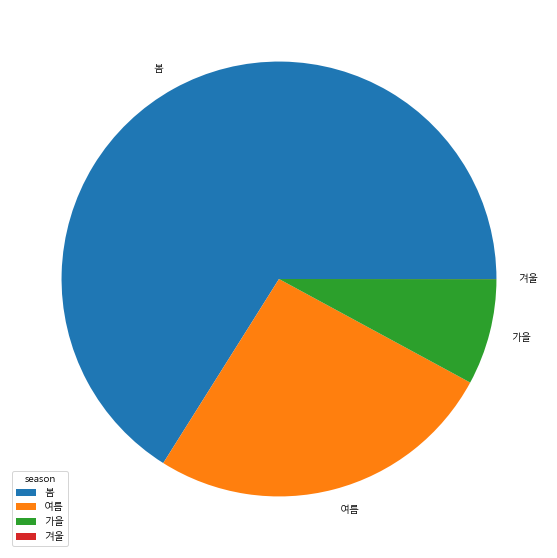

In [80]:
plt.figure(figsize=(10,10))
ratio_ = train['weather'].value_counts() / train['weather'].shape[0] # 비율

ratio_.index = ['봄', '여름', '가을', '겨울']
plt.pie(ratio_.values, labels=ratio_.index)
plt.legend(title='season')
plt.show()

### 기본 모델을 만들기 위해 피쳐 선택 등을 수행

In [82]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [83]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [84]:
## 데이터 나누기 ( 입력, 출력 )
## 모델 선택
## 모델 학습
## 모델 평가
## 최종 모델로 예측

In [85]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [138]:
sel = ['season', 'weather', 'temp','atemp', 'humidity']

X = train[sel]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 777)

### Linear Regression

In [139]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([ 1.60490680e+02,  1.26763487e+02,  2.42571230e+02, -2.41098487e-01,
        3.15592118e+02,  1.87424247e+02,  2.53658171e+02,  1.72376327e+02,
        1.37216491e+02,  1.72576930e+02])

In [140]:
# 평가 (model score) -- 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train)) 
print('테스트용 데이터 셋 평가 :', model.score(X_test, y_test)) # 자체평가 (결정계수)

학습용 데이터 셋 평가 :  0.2595443137000395
테스트용 데이터 셋 평가 : 0.2602968498048581


In [141]:
### MSE 평가지표로 평가해보기
np.sum((pred - y_test)**2) / len(pred)

24693.07569208965

In [142]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred, y_test)

24693.07569208965

### 의사결정트리

In [146]:
model_tree = DecisionTreeRegressor(max_depth=4, random_state = 77)
model_tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

In [147]:
# 결정계수
print('학습용 데이터 셋 평가 : ', model_tree.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model_tree.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.27734564672578554
테스트 데이터 셋 평가 :  0.2568060538645752


In [148]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_tree, y_test)

24809.6068821438

### 앙상블 학습

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
model_rf = RandomForestRegressor(max_depth = 4, random_state=77)
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)
pred[0:10]

array([203.55314822, 132.05378079, 211.86470811,  70.9224641 ,
       322.93539549, 242.27436507, 260.84044111, 109.21091962,
        79.67233132, 162.33671828])

In [165]:
print('학습용 데이터 셋 평가 : ', model_rf.score(X_train, y_train))
print('테스트용 데이터 셋 평가 : ', model_rf.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.29189453147487
테스트용 데이터 셋 평가 :  0.27618446105265027


In [166]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred, y_test)

24162.708899674704

3개의 모델의 비교 결과 앙상블 모델(RandomForestRegressor)이 가장 좋다.

### 최종 모델

In [154]:
sel

['season', 'weather', 'temp', 'atemp', 'humidity']

### 제출용 파일 만들기

In [170]:
test.shape, sub.shape

((6493, 9), (6493, 2))

In [173]:
sel

['season', 'weather', 'temp', 'atemp', 'humidity']

In [174]:
test_last = test[sel]

In [ ]:
model_final = RandomForestRegressor(max_depth=4, random_state=77)
model_final.

In [169]:
# 아멕스?
# 대용량 데이터 (파일 바꾸는 샘플코드 찾고)
# 파일 바꾸고 , 파일 용량 줄이고, 이후부터 코드는 많다.
# 배운 걸 토대로 공부해보는 게 좋겠다. ( Light GBM은 나중에) ,, 점수 올라가는 단계로

# 어느정도 올라가면 다양한 기법으로 방향을 잡고...했으면 좋겠다.

In [175]:
# 기존 것은 마무리 짓고 목요일부터는 기술적인 부분 ...
# 피피티도 기본 이상이 되면 좋겠다...!

In [ ]:
# Notion으로 다음 중간 발표로 할 것.!